In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split  
from sklearn import metrics
dta =sm.datasets.fair.load_pandas().data
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [3]:
dta['affair'] = (dta.affairs >0).astype(int)

In [4]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [5]:
dta.drop(columns='affairs',inplace=True)

In [6]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [7]:
dta.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,1.000000


 It seems that there are no missing values in our data. Great, let's see the distribution of data

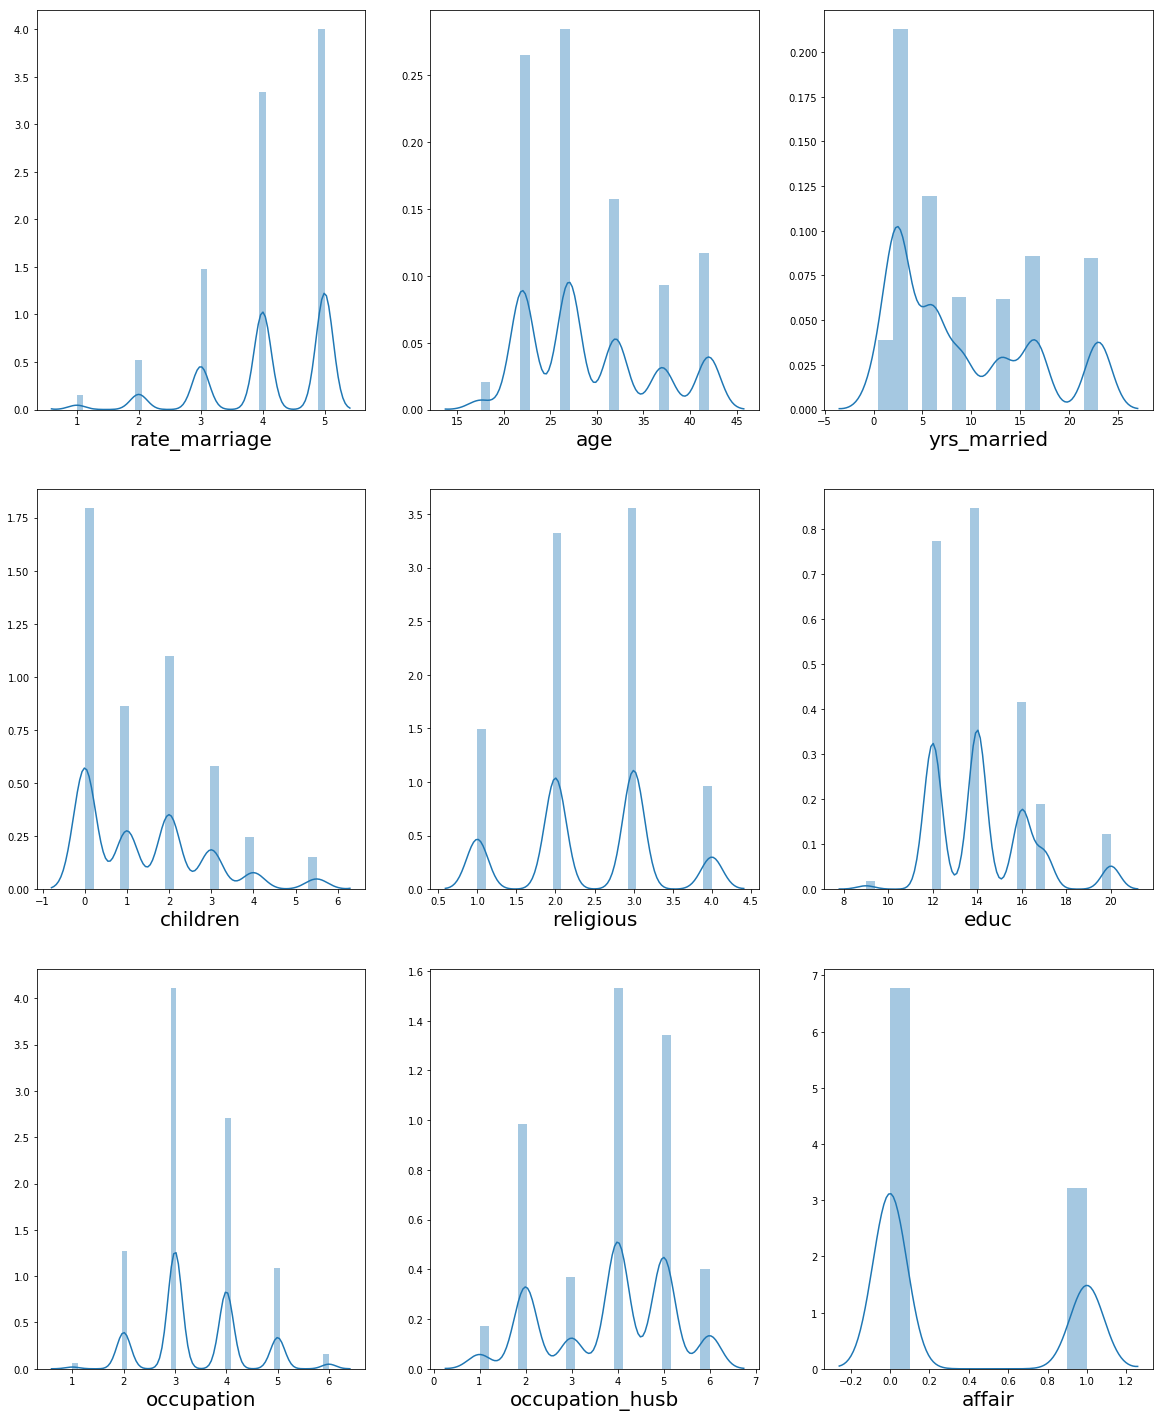

In [8]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in dta:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(dta[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()
        

As we can see their are multiple categorical features. Let us consider occupation and occupation hsbn as categorical and use dmatrices to resolve them.

In [9]:
y,X = dmatrices('affair ~ rate_marriage + age +yrs_married + children + religious + educ +C(occupation) + C(occupation_husb)',dta, return_type="dataframe")
X = X.rename(columns =
{'C(occupation)[T.2.0]':'occ_2',

'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})



In [10]:
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [11]:
y=dta['affair']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: affair, dtype: int32

In [12]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [13]:
X_scaled

array([[ 0.        ,  2.531984  , -0.88131913, ...,  1.11844056,
         0.65334148,  1.28115287],
       [ 0.        , -0.3949472 ,  1.13466276, ...,  1.11844056,
        -1.62378518, -0.09636416],
       [ 0.        , -0.3949472 ,  1.13466276, ..., -0.97454634,
        -1.62378518,  0.82198052],
       ...,
       [ 0.        , -0.3949472 ,  1.13466276, ..., -0.97454634,
        -0.48522185, -0.09636416],
       [ 0.        , -0.3949472 ,  1.13466276, ..., -0.27688404,
         0.65334148, -0.09636416],
       [ 0.        ,  2.531984  , -0.88131913, ..., -0.97454634,
        -0.48522185,  0.82198052]])

This is how our data looks now after scaling. Great, now we will check for multicollinearity using VIF(Variance Inflation factor)

In [14]:
vif= pd.DataFrame()
vif['VIF']=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['Features']=X.columns

C:\Users\pradeep kumar sharma\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1545: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [15]:
vif

,VIF,Features
0,NaN,Intercept
1,19.340780,occ_2
2,39.335618,occ_3
3,32.931910,occ_4
4,17.057165,occ_5
5,3.697959,occ_6
6,5.566292,occ_husb_2
7,2.991070,occ_husb_3
8,6.930281,occ_husb_4
9,6.577077,occ_husb_5


In [16]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.20, random_state = 355)

In [17]:
log_reg = LogisticRegression()

log_reg.fit(X_train,y_train)

C:\Users\pradeep kumar sharma\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
log_reg.score(X_test,y_test)

0.7189952904238619

In [19]:
y_pred = log_reg.predict(X_test)

In [20]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[773,  90],
       [268, 143]], dtype=int64)

In [21]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [22]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7189952904238619

In [23]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.895712630359212

In [24]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.7425552353506244

In [25]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8119747899159663